In [1]:
import os
import h5py
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
DATA_DIR = "./Data/Pollinator-Data-Sample_5pct_fraisiers_hdf5_observed_series0"

In [3]:
files = os.listdir(DATA_DIR)

In [28]:
def read_h5(file_dir, file_name):

    return_dict = {}
    
    # Parse metadata from filename
    metadata = file_name.split("_")
    CAM = metadata[0]
    SITE = metadata[1]
    D = metadata[2]
    M = metadata[3]
    Y = metadata[4]
    TIME = metadata[5]
    F = metadata[6].replace("f=", "")
    NF = metadata[7].replace("nf=", "").replace(".h5", "")

    # Extract data from h5 files
    with h5py.File(os.path.join(file_dir, file_name), "r") as f:
        images = f["images"][:]
        labels = f["labels"][:]
        timestamps = f["timestamps"][:]
        visit_numbers = f["visit_numbers"][:]

        # Populate Dictionary with data
        return_dict = {
            "images": images,
            "labels": labels,
            "timestamps": timestamps,
            "visit_numbers": visit_numbers
        }

    # Populate Dictionary with metadata
    return_dict ["metadata"] =  {
            "CAM": CAM,
            "SITE": SITE,
            "D": D,
            "M": M,
            "Y": Y,
            "TIME": TIME,
            "F": F,
            "NF": NF,
        }       
    
    return return_dict

def plot_image(img, lbl):
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Label: {lbl}")
    plt.show()

In [29]:
# Reading the first h5 file
data = read_h5(DATA_DIR, files[0])

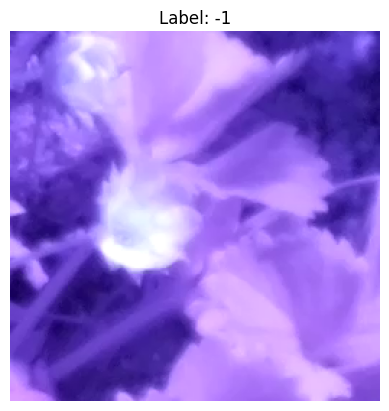

In [30]:
# Extract single image and its label
img = data["images"][99] 
lbl = data["labels"][99]
# visualize one image from the data
 
plot_image(img, lbl)